<a href="https://colab.research.google.com/github/crew-guy/ml-with-tensorflow/blob/main/tf_neural_nets_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Networks in Tensorflow

There are many definitions for a regression problem, but, in our case, we're going to simplify it: predicting a numerical variable based on some other combitaion of variables, even shorter....predicting a number

In [ ]:
# Import tensorflow
import tensorflow as tf
tf.__version__

'2.9.2'

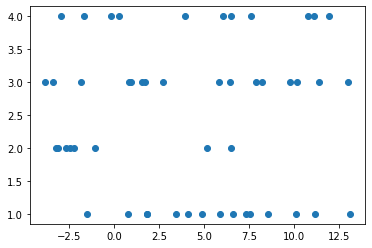

In [ ]:
## Creating data to view & fit
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.random.uniform(low=-5, high=13.3, size=(50,))

# Create labels
y = np.random.randint(low=1, high = 5, size=(50,))

# Visualize it
plt.scatter(X,y)

 ## Steps in modelling with tensorflow

 ![image](https://testbucket1841.s3.ap-south-1.amazonaws.com/tf-ml-course-udemy/archi.png)

 1. **Creating a model** - Define the input & output layers, as well as the hidden layers of a deep learning model.
 2. **Compiling a model** - Define the: 
    * Loss function - function that tells the model how wrong it is
    * Optimizer - suggests our model how to improve the patterns it is learning
    * Evaluation metrics - helps interpret performance of model

3.  **Fitting a model** - Letting the model try to find patters between X & y 
(features & labels)

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1,input_shape=[1])
])

# 2. Compile a model
model.compile(
    loss = tf.keras.losses.mae, # mae stands for "mean absolute error",
    optimizer = tf.keras.optimizers.SGD(), # SGD stands for stochastic gradient descent
    metrics = ["mae"]
)

# 3. Fit the model
# number of epochs = number of times our model trains over the entire sampling data
model.fit(X,y, epochs=5)

Epoch 1/5
2/2 [==============================] - 1s 8ms/step - loss: 2.6018 - mae: 2.6018
Epoch 2/5
2/2 [==============================] - 0s 7ms/step - loss: 2.2820 - mae: 2.2820
Epoch 3/5
2/2 [==============================] - 0s 7ms/step - loss: 2.0431 - mae: 2.0431
Epoch 4/5
2/2 [==============================] - 0s 7ms/step - loss: 1.8762 - mae: 1.8762
Epoch 5/5
2/2 [==============================] - 0s 7ms/step - loss: 1.8321 - mae: 1.8321


In [ ]:
# Checkout X and y
X, y

(array([11.14739218, 10.79844655, -2.26058371, -1.06479723,  8.57291541,
        -2.95780705, 11.94854425, -3.82987886, -0.17099268,  9.80429714,
         7.87853742,  6.04852443, 11.4040445 , -2.47309967, -1.52339064,
         1.550211  ,  5.15387935,  6.52865813, -3.42568457, 13.11725922,
         3.46375026,  1.84663137, 13.03702869,  0.77354954,  4.87831483,
        11.16233796,  7.55309929,  1.822858  , -3.24617266,  6.50201313,
         0.84791427,  8.20955361,  2.72282926, -1.67928718,  5.86766977,
         7.62859928,  4.0906748 ,  5.84823522, -1.87632994, 10.10799254,
         1.71865477,  0.95035419,  6.62655457,  3.93946164,  0.26422997,
         7.36222802, -2.68029752,  6.44048408, 10.15599444, -3.15225999]),
 array([4, 4, 2, 2, 1, 4, 4, 3, 4, 3, 3, 4, 3, 2, 1, 3, 2, 2, 3, 1, 1, 1,
        3, 1, 1, 1, 1, 1, 2, 4, 3, 3, 3, 4, 1, 4, 1, 3, 3, 1, 3, 3, 1, 4,
        4, 1, 2, 3, 3, 2]))

In [ ]:
# Try to make a prediction using our model
model.predict([11.9])

1/1 [==============================] - 0s 88ms/step


array([[3.4602978]], dtype=float32)

## Improving our model

Look at the 3 steps we took to create our model & see how you can improve accuracy during each step


1. **Creating a model** - Here, we can add more layers, increase number of hidden units ("neurons") in each hidden layer, change the activation function
2. **Compiling a model** - Here, we can change the optimization function or change the **learning rate** of the optimization function
3. **Training a model** - Here we might fit a model for more epochs (more cycles through sample data) or give it a larger sample data to train on, for each cycle

Changing all these values is called as "hyperparameter tuning"

In [ ]:
# Let's rebuild our model

X = tf.cast(tf.constant(X), dtype=tf.float64)
y = tf.cast(tf.constant(y), dtype=tf.float64)

print(X.shape)

# 1. Create our model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation="relu", input_shape=[1,]),
    # tf.keras.layers.Dense(1, activation=None, input_shape=[1,]),
])

# 2. Compile our model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(lr=0.01), # lr = learning_rate is one of the most important hyperparameters of machine learning
    metrics=["mae"]
)
# 3. Train our model
model.fit(X,y, epochs=100)

(50,)
Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 0s 10ms/step - loss: 2.6123 - mae: 2.6123
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 2.5244 - mae: 2.5244
Epoch 3/100
2/2 [==============================] - 0s 10ms/step - loss: 2.4401 - mae: 2.4401
Epoch 4/100
2/2 [==============================] - 0s 9ms/step - loss: 2.3636 - mae: 2.3636
Epoch 5/100
2/2 [==============================] - 0s 9ms/step - loss: 2.2852 - mae: 2.2852
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 2.1997 - mae: 2.1997
Epoch 7/100
2/2 [==============================] - 0s 16ms/step - loss: 2.1455 - mae: 2.1455
Epoch 8/100
2/2 [==============================] - 0s 12ms/step - loss: 2.0798 - mae: 2.0798
Epoch 9/100
2/2 [==============================] - 0s 11ms/step - loss: 2.0253 - mae: 2.0253
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 1.9603 - mae: 1.9603
Epoch 11/100
2/2 [==============================] - 0s 9ms/step - loss: 1.9163 - mae: 

In [ ]:
X,y

(<tf.Tensor: shape=(50,), dtype=float64, numpy=
 array([11.14739218, 10.79844655, -2.26058371, -1.06479723,  8.57291541,
        -2.95780705, 11.94854425, -3.82987886, -0.17099268,  9.80429714,
         7.87853742,  6.04852443, 11.4040445 , -2.47309967, -1.52339064,
         1.550211  ,  5.15387935,  6.52865813, -3.42568457, 13.11725922,
         3.46375026,  1.84663137, 13.03702869,  0.77354954,  4.87831483,
        11.16233796,  7.55309929,  1.822858  , -3.24617266,  6.50201313,
         0.84791427,  8.20955361,  2.72282926, -1.67928718,  5.86766977,
         7.62859928,  4.0906748 ,  5.84823522, -1.87632994, 10.10799254,
         1.71865477,  0.95035419,  6.62655457,  3.93946164,  0.26422997,
         7.36222802, -2.68029752,  6.44048408, 10.15599444, -3.15225999])>,
 <tf.Tensor: shape=(50,), dtype=float64, numpy=
 array([4., 4., 2., 2., 1., 4., 4., 3., 4., 3., 3., 4., 3., 2., 1., 3., 2.,
        2., 3., 1., 1., 1., 3., 1., 1., 1., 1., 1., 2., 4., 3., 3., 3., 4.,
        1., 4., 1.,

In [ ]:
model.predict([11.90])

1/1 [==============================] - 0s 62ms/step


array([[2.9089987]], dtype=float32)

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


 ## Evaluating a model

 In practice, a typical workflow you will go through when building neural networks looks like

 ```
 Build a model -> fit it -> evaluate it -> tweak the model -> fit it -> evaluate it -> tweak the model -> .....
 ```

While evaluating a model, 3 most important words are:

> Visualize, visualize, visualize 

It's a good idea to visualize 

* The data - What data are we working with? What does the data look like? 
* The model itself - what does our model look like
* The training of a model - How does a model perform as it is learning?
* The predictions of the model -How do the predictions match up against the ground truth (the original labels)


In [ ]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
y = X + 10

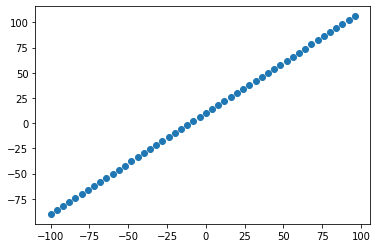

In [ ]:
plt.scatter(X,y)

### The 3 sets...

```
 Build a model -> fit it -> evaluate it -> tweak the model -> fit it -> evaluate it -> tweak the model -> .....
```

* **Training Set** - The data that the model is trained on. It learns from this data - 70-80% of the total data
* **Validation Set** - The model gets tweaked ("tuned") on this data. 10-15% of total data
* **Test Set** - The model gets evaluated on this data. 10-15% of total data.


In [ ]:
# Get 80% of data as training set
X_train = X[:40] # Get 40 rows out of 50 total (80% of the data)
y_train = y[:40]

# Get 10% of the data as test set
X_test = tf.slice(X,begin=[39],size=[10])
y_test = tf.slice(y,begin=[39],size=[10])

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

### Visualizing the data (for different sets)

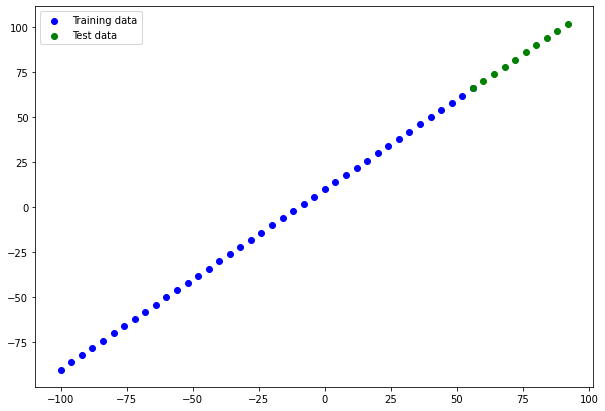

In [ ]:
# Visualizing the data
plt.figure(figsize=(10,7))

# For the training data
plt.scatter(X_train, y_train, c="blue", label="Training data")

# For the test data
plt.scatter(X_test, y_test, c="green", label="Test data")

# Show legend
plt.legend()

### Visualizing the model

In [ ]:
# We are passing in 1 variable to the layer to get 1 output number
X[0], y[0]

(<tf.Tensor: shape=(), dtype=int32, numpy=-100>,
 <tf.Tensor: shape=(), dtype=int32, numpy=-90>)

In [ ]:
# Let's create our model with an input-shape so that it gets automatically built without specifically calling the fit() or build() function
tf.random.set_seed(42)


# 1. Creating the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="hidden_layer_1"),
    tf.keras.layers.Dense(1, input_shape=[10], name="hidden_layer_2"),
], name="deep_model_1")

# 2. Compiling the model
model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ["mae"]
)

In [ ]:
model.summary()

Model: "deep_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer_1 (Dense)      (None, 10)                20        
                                                                 
 hidden_layer_2 (Dense)      (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


* Total params - The total number of weights (theta values) in the model
* Trainable params - The number of parameters that are updated when the model is training
* Non-trainable params - The number of parameters that are not updated when the model is training. Typically happens when we freeze the value of certain parameters when we bring in an already learnt model during **transfer learning** 


📖 Resource - for more understanding on types of parameters - check out MIT's deep learning video

In [ ]:
# Let's fit our model to training data
# Set the "verbose" argument to decide whether you look at your model train or not
model.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
2/2 [==============================] - 0s 7ms/step - loss: 27.4058 - mae: 27.4058
Epoch 2/100
2/2 [==============================] - 0s 5ms/step - loss: 24.6339 - mae: 24.6339
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 29.8935 - mae: 29.8935
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 27.4055 - mae: 27.4055
Epoch 5/100
2/2 [==============================] - 0s 5ms/step - loss: 14.9463 - mae: 14.9463
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 11.8819 - mae: 11.8819
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 11.1988 - mae: 11.1988
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 11.0910 - mae: 11.0910
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 40.4763 - mae: 40.4763
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 27.8687 - mae: 27.8687
Epoch 11/100
2/2 [==============================] - 0s 7ms/

In [ ]:
model.summary()

Model: "deep_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer_1 (Dense)      (None, 10)                20        
                                                                 
 hidden_layer_2 (Dense)      (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


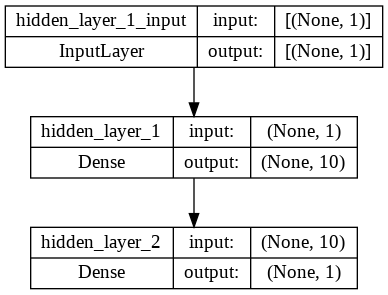

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

### Visualizing our model's predictions

To visualize our model's predictions, it's a good idea to plot them against ground truth values

Usually we see plots of the from `y_test` or `y_true` vs `y_pred` (ground truth vs model)

In [ ]:
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 51ms/step


array([[ 65.96446 ],
       [ 70.552185],
       [ 75.13991 ],
       [ 79.72764 ],
       [ 84.315346],
       [ 88.90308 ],
       [ 93.49081 ],
       [ 98.07852 ],
       [102.666245],
       [107.253975]], dtype=float32)

In [ ]:
 def plot_predictions(
     train_data = X_train,
     train_labels = y_train,
     test_data = X_test,
     test_labels = y_test,
     predictions = y_pred
 ):
    plt.figure(figsize=(10,7))

    # Plot the training data
    plt.scatter(X_train, y_train, c="b", label="Training data")


    # Plot the test data
    plt.scatter(X_test, y_test, c="g", label="Test data")

    # Plot the predictions
    plt.scatter(X_test, predictions, c="r", label="Predictions")

    # Show the legend
    plt.legend()

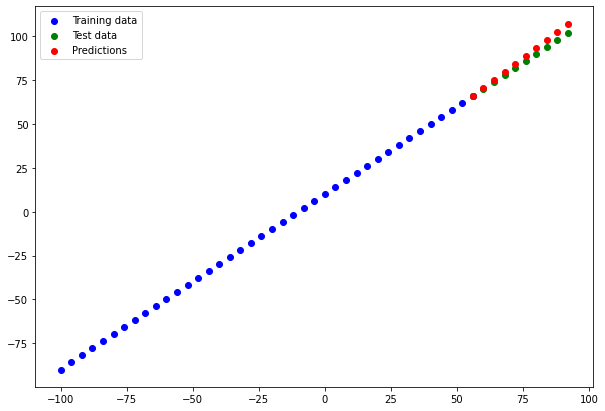

In [ ]:
plot_predictions(
    train_data = X_train,
    train_labels = y_train,
    test_data = X_test,
    test_labels = y_test,
    predictions = y_pred
)

### Evaluating our model's predictions with regression evaluation metrics


Depending on the problem we're working on, we can use different evaluation metrics to evaluate our model's performance

Since we're working with a regression problem, 2 common evaluation metrics include

* MAE - Mean average error - On average, how wrong is each prediction by my model?
* MSE - Mean squared error - Square of the average errors

![regression eval metrics](https://testbucket1841.s3.ap-south-1.amazonaws.com/tf-ml-course-udemy/regress-eval-metrics.png)



In [ ]:
# Evaluate the model on the test
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 177ms/step - loss: 2.6163 - mae: 2.6163


[2.6163222789764404, 2.6163222789764404]

In [ ]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 65.96446 ,  70.552185,  75.13991 ,  79.72764 ,  84.315346,
        88.90308 ,  93.49081 ,  98.07852 , 102.666245, 107.253975],
      dtype=float32)>

In [ ]:
# Calculate the mean square absolute error
mae = tf.keras.metrics.mean_absolute_error(
    y_test, tf.squeeze(y_pred)
)
mae

<tf.Tensor: shape=(), dtype=float32, numpy=2.6163247>

In [ ]:
def calculate_mean_squared_absolute_error(y_test = y_test, y_pred = y_pred):
    difference = tf.subtract(tf.cast(y_test, dtype=tf.int32),tf.cast(y_pred, dtype=tf.int32))
    square_difference = tf.math.square(difference)
    msd = tf.math.reduce_mean(square_difference, axis=0)
    return msd

In [ ]:
mse = calculate_mean_squared_absolute_error(y_test, tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=int32, numpy=7>

In [ ]:
mse = tf.keras.metrics.mean_squared_error(
    y_true=y_test, y_pred = tf.squeeze(y_pred)
)
mse

<tf.Tensor: shape=(), dtype=float32, numpy=9.657718>

In [ ]:
# Make some reusable functions for mse & mae

def mse(y_true, y_pred):
    return tf.keras.metrics.mean_squared_error(
        y_true, y_pred = tf.squeeze(y_pred)
    )

def mae(y_true, y_pred):
    return tf.keras.metrics.mean_absolute_error(
        y_true, y_pred = tf.squeeze(y_pred)
    )


## Running experiments for improving our model


```
Build the model -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it -> tweak it -> .....
```


Approaches to improve accuracy

1. Get more data -> Get a larger dataset that we can train our model on
2. Make model larger -> Use more hidden layers or increase number of neurons in each hidden layer
3. Train for longer -> Give your model more of a chance to find patterns in the dataset

Let's do 3 modelling experiments

1. `model_1` : Same as original model - 1 layer, 100 epochs
2. `model_2` : 2 layers, trained for 100 epochs
3. `model_3` : 2 layers, trained for 500 epochs

In [ ]:
# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

# 2. Compile the model
model_1.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ["mae"]
)

# 3. Train the model
model_1.fit(X_train, y_train, epochs = 100)

Epoch 1/100
2/2 [==============================] - 0s 8ms/step - loss: 8.6049 - mae: 8.6049
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 10.4695 - mae: 10.4695
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 10.9015 - mae: 10.9015
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 9.4167 - mae: 9.4167
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 10.3042 - mae: 10.3042
Epoch 6/100
2/2 [==============================] - 0s 5ms/step - loss: 9.5497 - mae: 9.5497
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 8.6695 - mae: 8.6695
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 9.0480 - mae: 9.0480
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 19.0087 - mae: 19.0087
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 10.2539 - mae: 10.2539
Epoch 11/100
2/2 [==============================] - 0s 6ms/step - los

In [ ]:

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(20, input_shape=[1]),
    tf.keras.layers.Dense(1, input_shape=[20])
])

model_2.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ["mae"]
)


model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 10ms/step - loss: 26.7433 - mae: 26.7433
Epoch 2/100
2/2 [==============================] - 0s 11ms/step - loss: 24.2996 - mae: 24.2996
Epoch 3/100
2/2 [==============================] - 0s 8ms/step - loss: 30.3901 - mae: 30.3901
Epoch 4/100
2/2 [==============================] - 0s 13ms/step - loss: 23.6217 - mae: 23.6217
Epoch 5/100
2/2 [==============================] - 0s 24ms/step - loss: 14.0794 - mae: 14.0794
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 11.2614 - mae: 11.2614
Epoch 7/100
2/2 [==============================] - 0s 9ms/step - loss: 12.2672 - mae: 12.2672
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 10.9063 - mae: 10.9063
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 38.1968 - mae: 38.1968
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 25.7535 - mae: 25.7535
Epoch 11/100
2/2 [==============================] - 0s 

In [ ]:
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(20, input_shape = [1]),
    tf.keras.layers.Dense(1, input_shape=[20])
])

model_3.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ["mae"]
)

model_3.fit(X_train, y_train, epochs = 500)

Epoch 1/500
2/2 [==============================] - 1s 10ms/step - loss: 31.1563 - mae: 31.1563
Epoch 2/500
2/2 [==============================] - 0s 9ms/step - loss: 27.0847 - mae: 27.0847
Epoch 3/500
2/2 [==============================] - 0s 9ms/step - loss: 31.6405 - mae: 31.6405
Epoch 4/500
2/2 [==============================] - 0s 9ms/step - loss: 15.8429 - mae: 15.8429
Epoch 5/500
2/2 [==============================] - 0s 11ms/step - loss: 22.3177 - mae: 22.3177
Epoch 6/500
2/2 [==============================] - 0s 17ms/step - loss: 12.3927 - mae: 12.3927
Epoch 7/500
2/2 [==============================] - 0s 21ms/step - loss: 14.3831 - mae: 14.3831
Epoch 8/500
2/2 [==============================] - 0s 6ms/step - loss: 13.9334 - mae: 13.9334
Epoch 9/500
2/2 [==============================] - 0s 9ms/step - loss: 31.9442 - mae: 31.9442
Epoch 10/500
2/2 [==============================] - 0s 6ms/step - loss: 21.3625 - mae: 21.3625
Epoch 11/500
2/2 [==============================] - 0s 

In [ ]:
y_eval_2 = model_2.evaluate(X_test, y_test)

1/1 [==============================] - 0s 266ms/step - loss: 12.2232 - mae: 12.2232


In [ ]:
y_eval_3 = model_3.evaluate(X_test, y_test)

1/1 [==============================] - 0s 395ms/step - loss: 64.4158 - mae: 64.4158


In [ ]:
y_eval_1 = model_1.evaluate(X_test, y_test)

1/1 [==============================] - 0s 165ms/step - loss: 7.7581 - mae: 7.7581


In [ ]:
y_pred_1 = model_1.predict(X_test)
y_pred_2 = model_2.predict(X_test)
y_pred_3 = model_3.predict(X_test)

1/1 [==============================] - 0s 132ms/step


1/1 [==============================] - 0s 250ms/step


1/1 [==============================] - 0s 229ms/step


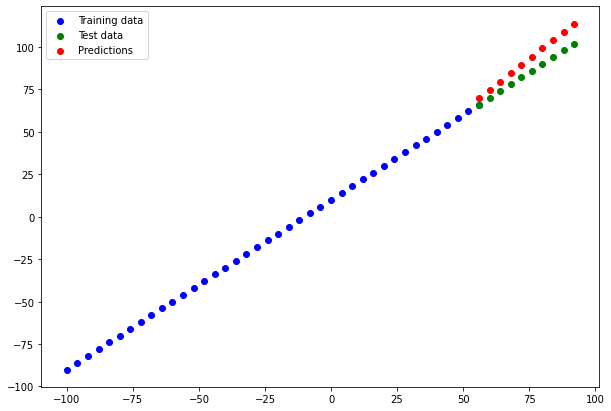

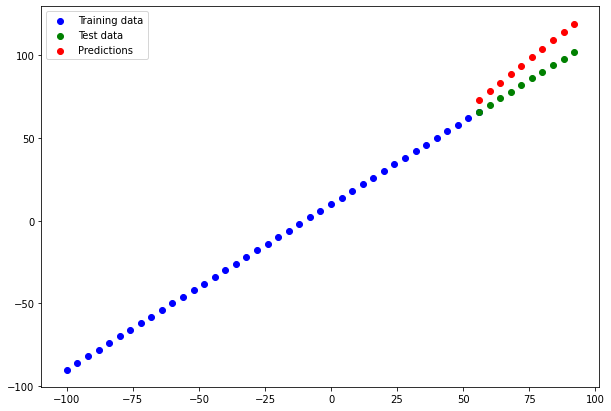

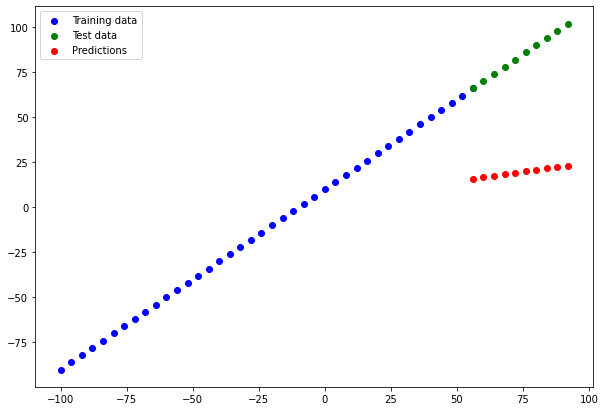

In [ ]:
# Plotting the graphs
plot_predictions(
    predictions = y_pred_1
)

plot_predictions(
    predictions = y_pred_2
)

plot_predictions(
    predictions = y_pred_3
)

In [ ]:
# Calculate model_1, model_2, model_3 evaluation metrics
mae_1 = mae(y_test, y_pred_1)
mse_1 = mse(y_test, y_pred_1)
mae_2 = mae(y_test, y_pred_2)
mse_2 = mse(y_test, y_pred_2)
mae_3 = mae(y_test, y_pred_3)
mse_3 = mse(y_test, y_pred_3)

print("mae 1:", mae_1.numpy(), "\n")
print("mae 2:", mae_2.numpy(), "\n")
print("mae 3:", mae_3.numpy(), "\n")

print("\n")
print("mse 1:", mse_1.numpy(), "\n")
print("mse 2:", mse_2.numpy(), "\n")
print("mse 3:", mse_3.numpy(), "\n")

mae 1: 7.7581 

mae 2: 12.223182 

mae 3: 64.41577 



mse 1: 66.715485 

mse 2: 159.47891 

mse 3: 4233.419 



### Compare experiment results

We've run a few experiments. Let's compare the results of these experiments now.

In [ ]:
# Let's compare our model's results using a pandas DataFrame
import pandas as pd
model_results = [
    ["model 1", mae_1.numpy(), mse_1.numpy()],
    ["model 2", mae_2.numpy(), mse_2.numpy()],
    ["model 3", mae_3.numpy(), mse_3.numpy()],
]


all_results = pd.DataFrame(model_results, columns = ["model", "mae", "mse"])
all_results

,model,mae,mse
0,model 1,7.758100,66.715485
1,model 2,12.223182,159.478912
2,model 3,64.415771,4233.418945


Looks like `model_2` performed the best

In [ ]:
model_2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 20)                40        
                                                                 
 dense_4 (Dense)             (None, 1)                 21        
                                                                 
Total params: 61
Trainable params: 61
Non-trainable params: 0
_________________________________________________________________


> 🔑 **Note** : One of your main goals is to minimize the time between your experiements. The more things you try out, the more you will figure out which don't work, the closer you will get to figuring out what does work
<br/>
> Machine learning practitioner's motto - "experiment, experiment, experiment" 

## Tracking your experiments

One really good habit in machine learning modelling is to track the results of your experiements. And when doing so, it can be tedious if you're running lot's of experiments

📖 Resource : Helpful tools in this situation are:
1. TensorBoard - A component of tensorflow library to help track modelling experiments (we'll see this one later)
2. Weights & Biases - A tool for tracking all kinds of machine learning experiments (plugs straight into TensorBoard)

## Save a tensorflow model

This is usually done to actually use a model outside of Google collab (or wherever it is trained), such as in a mobile or a web application

There are 2 ways you can store this in

1. SavedModel Format - Use when you want to reuse tweaking & training the model in the TF envmt (train only using tf code) 
2. HDF5 Format - Use when you want to reuse tweaking & training the model outside of TF envmt

In [ ]:
# Save model using the SavedModel format
model_2.save('model_2_SavedModel_format')

In [ ]:
# Save model using the HDF5 format
model_2.save("model_2_HDF5_format.h5")

## Loading in a saved model

In [ ]:
# Load in the SavedModel format model
loaded_SavedModel_format = tf.keras.models.load_model('/content/model_2_SavedModel_format')
loaded_SavedModel_format.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 20)                40        
                                                                 
 dense_4 (Dense)             (None, 1)                 21        
                                                                 
Total params: 61
Trainable params: 61
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Summary of loaded model should match that of the model that we saved
model_2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 20)                40        
                                                                 
 dense_4 (Dense)             (None, 1)                 21        
                                                                 
Total params: 61
Trainable params: 61
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Comparing the predictions of loaded model with that of model being saved
model_2_preds = model_2.predict(X_test)
loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(X_test)
model_2_preds == loaded_SavedModel_format_preds

1/1 [==============================] - 0s 80ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
# Load in thr H5 model
loaded_h5_model = tf.keras.models.load_model('/content/model_2_HDF5_format.h5')

loaded_h5_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 20)                40        
                                                                 
 dense_4 (Dense)             (None, 1)                 21        
                                                                 
Total params: 61
Trainable params: 61
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Check whether the loaded model & the model to be saved are returning the same thing
model_2_preds = model_2.predict(X_test)
loaded_h5_model_preds = loaded_h5_model.predict(X_test)
loaded_h5_model_preds == model_2_preds

1/1 [==============================] - 0s 97ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## Download a model

If you want to download your files, you can:
1. Use the UI in the File Explorer
2. Use code (see cell below)
3. Saved it in Google Drive by mounting the drive

In [ ]:
# Download a file from Google Colab
from google.colab import files
files.download('/content/model_2_HDF5_format.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Save a file from Google Colab to Google Drive (requires mounting Google Drive)
# !cp /content/model_2_HDF5_format.h5 /PATH/TO/DESTINATION/FOLDER/IN/DRIVE

## A larger model

### Preparing the data

In [ ]:
# Medical insurance history dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# Let's one hot encode our data
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [ ]:
# Creating X & y values
y_total = insurance_one_hot.loc[:,"charges"]
X_total = insurance_one_hot.loc[:, insurance_one_hot.columns != 'charges']
X_total.head(), y_total.head()

(   age     bmi  children  sex_female  sex_male  smoker_no  smoker_yes  \
 0   19  27.900         0           1         0          0           1   
 1   18  33.770         1           0         1          1           0   
 2   28  33.000         3           0         1          1           0   
 3   33  22.705         0           0         1          1           0   
 4   32  28.880         0           0         1          1           0   
 
    region_northeast  region_northwest  region_southeast  region_southwest  
 0                 0                 0                 0                 1  
 1                 0                 0                 1                 0  
 2                 0                 0                 1                 0  
 3                 0                 1                 0                 0  
 4                 0                 1                 0                 0  ,
 0    16884.92400
 1     1725.55230
 2     4449.46200
 3    21984.47061
 4     3866.85520
 

In [ ]:
X_total_numpy = X_total.to_numpy()
y_total_numpy = y_total.to_numpy()
X_total_tensor = tf.constant(X_total_numpy)
y_total_tensor = tf.constant(y_total_numpy)
sample_size = len(y_total_numpy)
training_size = (tf.math.floor(0.8*sample_size)).numpy()
test_size = sample_size - training_size

training_size, test_size

X_train = X_total_tensor[:int(training_size),:]
X_test = X_total_tensor[:int(test_size),:]
y_train = y_total_tensor[:int(training_size)]
y_test = y_total_tensor[:int(test_size)]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

(TensorShape([1070, 11]),
 TensorShape([268, 11]),
 TensorShape([1070]),
 TensorShape([268]))

🔑**NOTE**: For training, testing dataset split

We can also use the train_test_split function from sklearn.model_selection
Reference [Link](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

### Creating 2 models


2 models will be created. Both models 100 epochs of training & will use the Adam optimizer
The differentiating factor is the learning

1. `model_1` : 1 layer,Learning rate is 0.003
2. `model_2` : 2 layers, Learning rate is 0.001

In [ ]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[11])
])

model_1.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(lr=0.003)
)

model_1.fit(X_train,y_train, epochs = 100, verbose=1)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


34/34 [==============================] - 1s 4ms/step - loss: 13170.8604
Epoch 2/100
34/34 [==============================] - 0s 5ms/step - loss: 13163.1924
Epoch 3/100
34/34 [==============================] - 0s 4ms/step - loss: 13155.5186
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 13147.8643
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 13140.2002
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 13132.5312
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 13124.8682
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 13117.1875
Epoch 9/100
34/34 [==============================] - 0s 4ms/step - loss: 13109.5156
Epoch 10/100
34/34 [==============================] - 0s 5ms/step - loss: 13101.8447
Epoch 11/100
34/34 [==============================] - 0s 2ms/step - loss: 13094.1758
Epoch 12/100
34/34 [==============================] - 0s 3ms/step - loss: 13086.4980
E

In [ ]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=[11]),
    tf.keras.layers.Dense(1, input_shape=[100])
])

model_2.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(lr=0.003)
)

model_2.fit(X_train,y_train, epochs = 100, verbose=1)

Epoch 1/100
34/34 [==============================] - 0s 2ms/step - loss: 13140.9951
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 12877.2939
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 12311.9854
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 11357.5615
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 10115.2744
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 8873.1201
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7956.6104
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7517.1021
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7404.6689
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7370.0308
Epoch 11/100
34/34 [==============================] - 0s 2ms/step - loss: 7343.1118
Epoch 12/100
34/34 [==============================] - 0s 2ms/step - loss: 7317.8

### Analyzing & visualing nature of parameters in each model

In [ ]:
model_1.summary(), model_2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 1)                 12        
                                                                 
Total params: 12
Trainable params: 12
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 100)               1200      
                                                                 
 dense_9 (Dense)             (None, 1)                 101       
                                                                 
Total params: 1,301
Trainable params: 1,301
Non-trainable params: 0
_________________________________________________________________


(None, None)

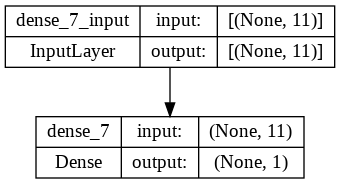

In [ ]:
# Understanding different layers of our models
from tensorflow.keras.utils import plot_model

plot_model(model=model_1, show_shapes=True)

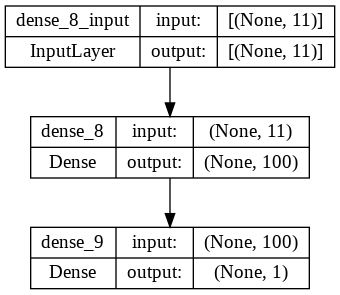

In [ ]:
plot_model(model=model_2, show_shapes=True)

### Evaluating our models

In [ ]:
model_1.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 12828.1045


12828.1044921875

In [ ]:
model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 5782.0811


5782.0810546875

In [ ]:
# Getting the predictions of our models
model_1_predictions = model_1.predict(X_test)
model_2_predictions = model_2.predict(X_test)

9/9 [==============================] - 0s 2ms/step


In [ ]:
def mae(y_true, y_pred):
    return tf.keras.metrics.mean_absolute_error(
    y_true, tf.squeeze(y_pred)
)
    
def mse(y_true, y_pred):
    return tf.keras.metrics.mean_squared_error(
    y_true, tf.squeeze(y_pred)
)

In [ ]:
mae_1 = mae(y_test, model_1_predictions).numpy()
mae_2 = mae(y_test, model_2_predictions).numpy()
mse_1 = mse(y_test, model_1_predictions).numpy()
mse_2 = mse(y_test, model_2_predictions).numpy()

data = [
    ["model_1", mae_1, mse_1],
    ["model_2", mae_2, mse_2]
]

df = pd.DataFrame(data, columns=['Model', 'MAE', 'MSE'])
df

,Model,MAE,MSE
0,model_1,12828.102539,318445536.0
1,model_2,5782.080566,127454232.0


### Visualizing our models

In [ ]:
## Visualizing 2 models
model_1_predictions.shape, model_2_predictions.shape

((268, 1), (268, 1))

In [ ]:
## Comparing experiment results of the 2 models
import matplotlib.pyplot as plt

def plot_predictions(
    X_train = X_train,
    X_test = X_test,
    y_train = y_train,
    y_test = y_test,
    predictions = model_1_predictions
):
    plt.figure(figsize=(10,7))
    plt.scatter(X_train[:,1], y_train, c='b', label="Training data")
    plt.scatter(X_test[:,1], y_test, c='g', label="Testing data")
    plt.scatter(X_test[:,1], tf.squeeze(predictions), c='r', label="Predictions")

# X_train[:,1].shape, y_train.shape, X_test[:,1].shape, model_1_predictions.shape

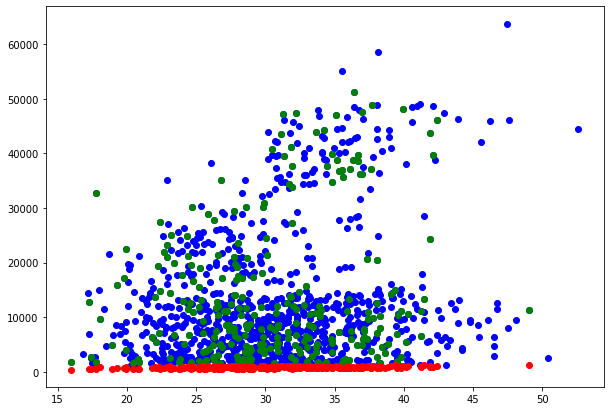

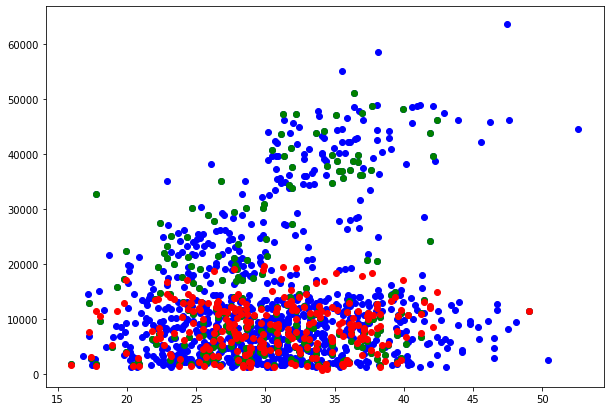

In [ ]:
plot_predictions(
    X_train,
    X_test,
    y_train,
    y_test,
    model_1_predictions
)

plot_predictions(
    X_train,
    X_test,
    y_train,
    y_test,
    model_2_predictions
)

### Results

Thus, we have arrived at a conclusion that our `model_2` - a model trained with more layers & for more epochs offered better predictions. Hence, we will save it

In [ ]:
# Save model using the SavedModel format
model_2.save('data_model_2_SavedModel_format')
model_2.save('data_model_2_SavedModel_format.h5')

In [ ]:
# Load in the SavedModel format model
loaded_SavedModel_format = tf.keras.models.load_model('/content/data_model_2_SavedModel_format')
loaded_SavedModel_format.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 100)               1200      
                                                                 
 dense_9 (Dense)             (None, 1)                 101       
                                                                 
Total params: 1,301
Trainable params: 1,301
Non-trainable params: 0
_________________________________________________________________


## Preprocessing data (normalization & standardization)

In terms of scaling values, neural networks tend to prefer normalization. 

If you're not sure on which to use, you could try both & see which performs better

![Image](https://testbucket1841.s3.ap-south-1.amazonaws.com/tf-ml-course-udemy/feature-scaling.png)


To prepare our data, we can borrow a few classes from Scikit-learn

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # turn all values in these columns 0 and 1
    (OneHotEncoder(handle_unknown="ignore"),['sex', 'smoker','region'])
)

# Create X & y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build our train & test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

# Fit the column transformer to our training data
ct.fit(X_train)

# Transform training & test data with normalization & OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [ ]:
# What does our data look like now?
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [ ]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

In [ ]:
model_2.fit(X_train_normal, y_train, epochs = 100)

Epoch 1/100
34/34 [==============================] - 0s 2ms/step - loss: 15066.9023
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 14698.0420
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 14378.0752
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 14107.8262
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 13871.4766
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 13658.6963
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 13462.5156
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 13277.6084
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 13099.6221
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 12924.9121
Epoch 11/100
34/34 [==============================] - 0s 2ms/step - loss: 12750.3154
Epoch 12/100
34/34 [==============================] - 0s 2ms/step - loss: 

In [ ]:
model_2_predictions = model_2.predict(X_test_normal)
mae_2 = mae(y_test, model_2_predictions)
mae_2

9/9 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(), dtype=float32, numpy=5270.7446>

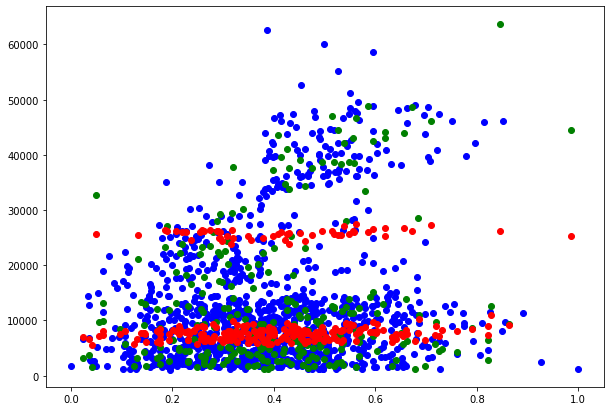

In [ ]:
plot_predictions(
    X_train_normal,
    X_test_normal,
    y_train,
    y_test,
    model_2_predictions
)

In [ ]:
# Result from un-normalized data below
# 9/9 [==============================] - 0s 3ms/step - loss: 5782.0811
# 5782.0810546875
model_2.evaluate(X_test_normal, y_test)

# Thus, we achieved an increase of 8.64%

9/9 [==============================] - 0s 2ms/step - loss: 5270.7446


5270.74462890625